In [1]:
#import all required libraries
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
#parameters
eta = 0.5
r_i = 0.1
r_f = 15
Nr = 500
T = 1.5
Nt = 3000
h = 1
Save = 500

First we will write all the codes for $B_r$. A sin function is used as initial condition.

In [3]:
#initial conditions
def B_r0(r):
    return np.sin((4*np.pi * r/r_f))

def dBrdt(B, dBdr, ddBddr, r):
    return eta * (ddBddr + (dBdr/r) - B/(r**2) - (((np.pi ** 2) * B) / (4 * (h ** 2))))


# defining intial B_r
r = np.linspace(r_i, r_f, Nr)
B_r = B_r0(r)
dt = T/Nt

save_buffer = int(Nt / Save)   #buffer to save B_r at every Save time steps

B_list = [B_r]                 #list to store B_r at each time step

dr = r[1] - r[0]               #step size in r


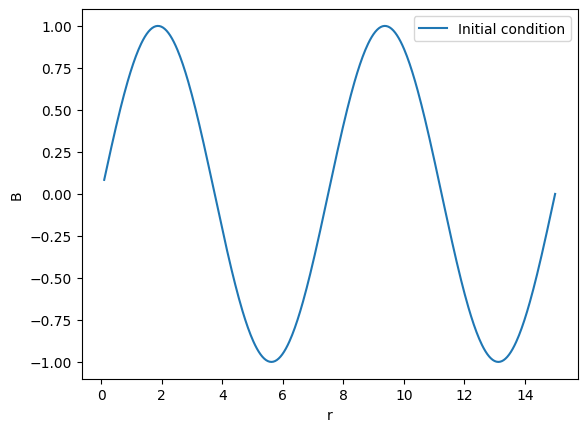

In [4]:
# plotting initial condition
plt.plot(r, B_list[0], label = 'Initial condition')
plt.xlabel('r')
plt.ylabel('B')
plt.legend()
plt.show()



In [5]:
#now we will solve the differential equation using finite difference method
#6 th order finite difference method is used to solve the differential equation
#the boundary conditions are enforced using relative antisymmetric ghost zones
def spatial_derivative(B, dx):

    B_ = np.copy(B)   #copying the array to avoid changing the original array
    
    # putting relative anti-symmetric ghost zone
    B_ = np.append(-np.flip(B_[1:4]), B_)    #adding ghost zones at the beginning
    B_ = np.append(B_, -np.flip(B_[-4:-1]))  #adding ghost zones at the end
    B_[0:3] = B_[0:3] + (2 * B[0])           #enforcing boundary conditions
    B_[-3:] = B_[-3:] + (2 * B[-1])           
    
 
    
    dfdx = []
    ddfddx = []
    
    # 6th order finite difference
    for i in range(3,len(B_)-3):
        dfdx.append(((- B_[i-3]) + (9*B_[i-2]) - (45*B_[i-1]) + (45*B_[i+1]) - (9*B_[i + 2]) + (B_[i + 3])) / (60 * dx))
        ddfddx.append(((2*B_[i-3]) - (27*B_[i-2]) + (270*B_[i-1]) - (490*B_[i]) + (270*B_[i+1]) - (27*B_[i+2]) + (2*B_[i+3])) / (180 * (dx ** 2)))
    
    dfdx = np.array(dfdx)
    ddfddx = np.array(ddfddx)
    
    return dfdx, ddfddx

In [6]:
#check the working of ghost zones
# test - disable later
A = np.array([1,2,3,4,5,6,7,8,9,10])
Q= np.copy(A)
    
Q= np.append(np.flip(Q[1:4]), Q)
Q= np.append(Q, np.flip(Q[-4:-1]))
print(Q)

#Works!!!


[ 4  3  2  1  2  3  4  5  6  7  8  9 10  9  8  7]


In [7]:
for i in tqdm(range(1, Nt+1)):
    dBdr, ddBddr = spatial_derivative(B_r, dr)
    
    k1 = dt * dBrdt(B_r, dBdr, ddBddr, r)
    k2 = dt * dBrdt(B_r + (k1/2), dBdr, ddBddr, r)
    k3 = dt * dBrdt(B_r + (k2/2), dBdr, ddBddr, r)
    k4 = dt * dBrdt(B_r + k3, dBdr, ddBddr, r)
    
    B_r = B_r + (k1 + (2*k2) + (2*k3) + k4)/6
    
    if (i % save_buffer) == 0:
        B_list.append(B_r)


  0%|          | 0/3000 [00:00<?, ?it/s]

100%|██████████| 3000/3000 [00:05<00:00, 559.58it/s]


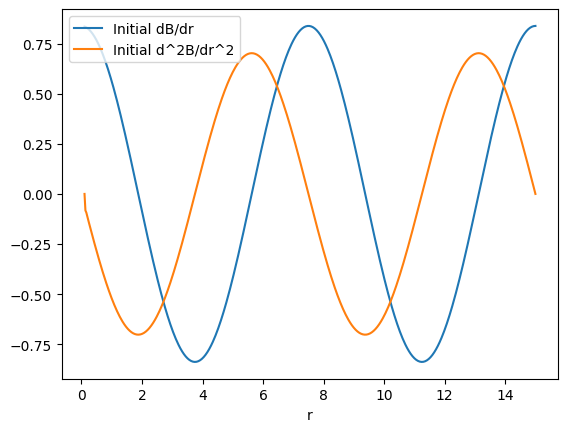

In [8]:

dBdr, ddBddr = spatial_derivative(B_list[0], dr)
plt.plot(r, dBdr, label = 'Initial dB/dr')
plt.plot(r, ddBddr, label = 'Initial d^2B/dr^2')
plt.xlabel('r')
plt.legend()
plt.show()

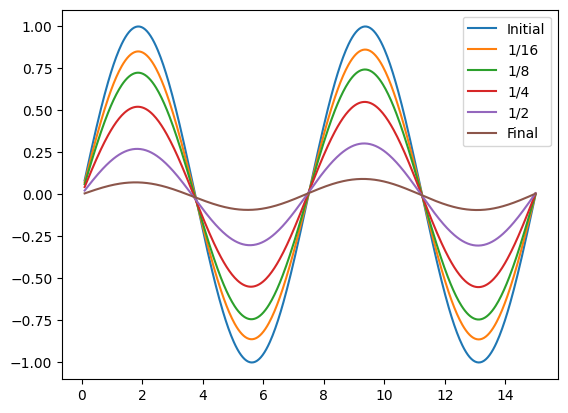

In [9]:
# plotting
fig, ax = plt.subplots()
ax.plot(r, B_list[0], label='Initial')
# ax.plot(r, B_list[1], label='1')
# ax.plot(r, B_list[2], label='2')
ax.plot(r, B_list[int(Save/16)], label='1/16')
ax.plot(r, B_list[int(Save/8)], label='1/8')
ax.plot(r, B_list[int(Save/4)], label='1/4')
ax.plot(r, B_list[int(Save/2)], label='1/2')
ax.plot(r, B_list[-1], label='Final')
ax.legend()
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


IndexError: list index out of range

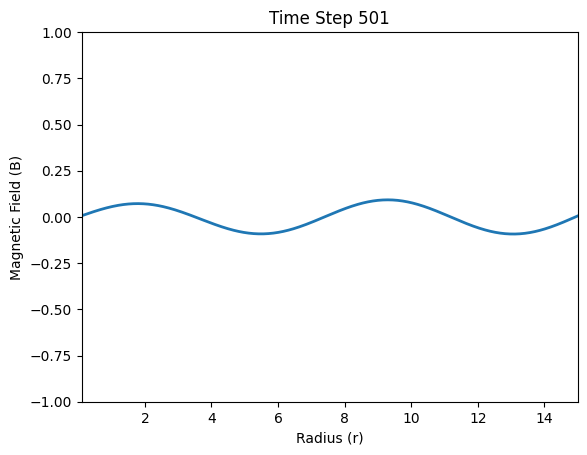

In [10]:
# animate using matplotlib
import matplotlib.animation as animation

fig, ax = plt.subplots()
ax.set_xlim(r_i, r_f)
ax.set_ylim(-1, 1)
ax.set_xlabel('Radius (r)')
ax.set_ylabel('Magnetic Field (B)')
ax.set_title('Evolution of Magnetic Field with Radius')
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = r
    y = B_list[i]
    line.set_data(x, y)
    ax.set_title(f'Time Step {i+1}')
    return line,

ani = animation.FuncAnimation(fig, animate, frames=Nt, init_func=init, blit=True)
ani.save('B_r_t_1.gif', writer='ffmpeg', fps=30)

# plt.show()


We can see that the $B_r$ decay is as expected.We can do the same steps for $B_phi$


In [13]:
def B_phi0(r):
    return np.cos(( 4*np.pi * r/r_f))

def dBphidt(B_r, B_phi, dBdr, ddBddr, r):
    return eta * (ddBddr + (dBdr/r) - B_phi/(r**2) - (((np.pi ** 2) * B_phi) / (4 * (h ** 2)))) - B_r / r

B_phi = B_phi0(r)
B_list_phi = [B_phi]

for i in tqdm(range(1, Nt+1)):
    dBdr, ddBddr = spatial_derivative(B_phi, dr)
    
    k1 = dt * dBphidt(B_r, B_phi, dBdr, ddBddr, r)
    k2 = dt * dBphidt(B_r, B_phi + (k1/2), dBdr, ddBddr, r)
    k3 = dt * dBphidt(B_r, B_phi + (k2/2), dBdr, ddBddr, r)
    k4 = dt * dBphidt(B_r, B_phi + k3, dBdr, ddBddr, r)
    
    B_phi = B_phi + (k1 + (2*k2) + (2*k3) + k4)/6
    
    if (i % save_buffer) == 0:
        B_list_phi.append(B_phi)




100%|██████████| 3000/3000 [00:05<00:00, 582.22it/s]


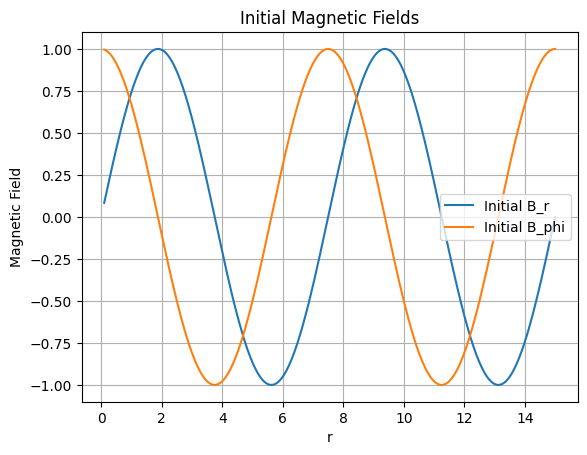

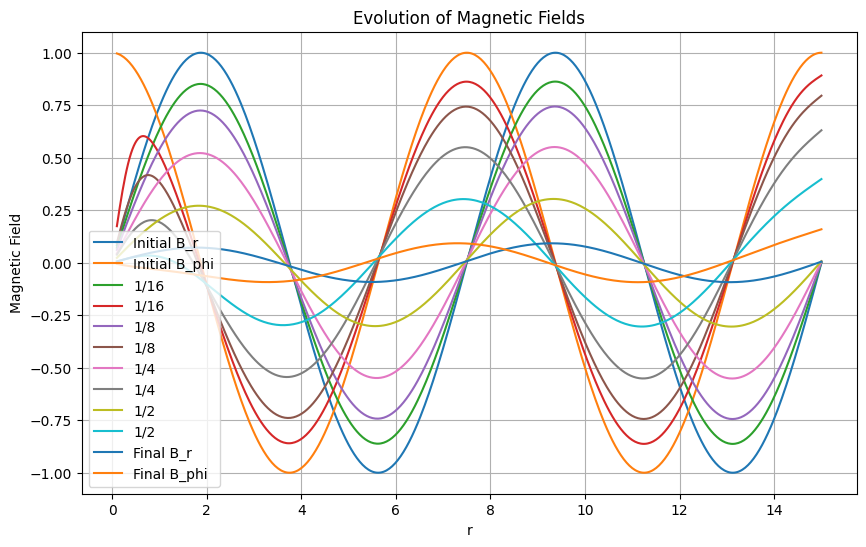

In [14]:
plt.plot(r, B_list[0], label='Initial B_r')
plt.plot(r, B_list_phi[0], label='Initial B_phi')
plt.xlabel('r')
plt.ylabel('Magnetic Field')
plt.legend()
plt.title('Initial Magnetic Fields')
plt.grid(True)
plt.show()

# Plotting evolution
plt.figure(figsize=(10, 6))

plt.plot(r, B_list[0], label='Initial B_r')
plt.plot(r, B_list_phi[0], label='Initial B_phi')
plt.plot(r, B_list[int(Save/16)], label='1/16')
plt.plot(r, B_list_phi[int(Save/16)], label='1/16')
plt.plot(r, B_list[int(Save/8)], label='1/8')
plt.plot(r, B_list_phi[int(Save/8)], label='1/8')
plt.plot(r, B_list[int(Save/4)], label='1/4')
plt.plot(r, B_list_phi[int(Save/4)], label='1/4')
plt.plot(r, B_list[int(Save/2)], label='1/2')
plt.plot(r, B_list_phi[int(Save/2)], label='1/2')
plt.plot(r, B_list[-1], label='Final B_r')
plt.plot(r, B_list_phi[-1], label='Final B_phi')
plt.xlabel('r')
plt.ylabel('Magnetic Field')
plt.legend()
plt.title('Evolution of Magnetic Fields')
plt.grid(True)
plt.show()

Now that we have both $B_r$ and $B_{\phi}$, the magnetic field is given by:
\begin{equation}
B = \sqrt{B_r^2 + B_{\phi}^2}
\end{equation}

MovieWriter ffmpeg unavailable; using Pillow instead.


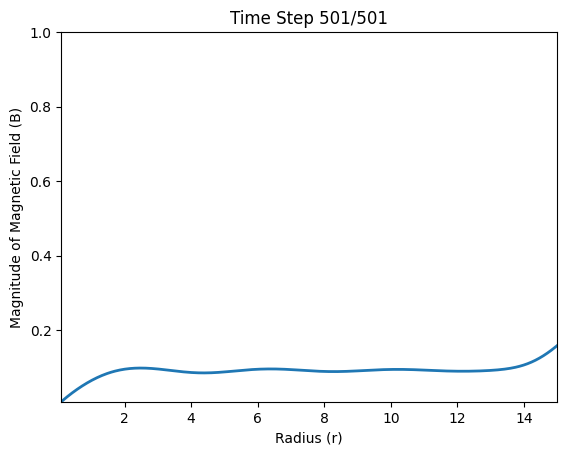

In [15]:
# Calculate magnitude of magnetic field
B_list_mag = [np.sqrt(B_r**2 + B_phi**2) for B_r, B_phi in zip(B_list, B_list_phi)]

# Ensure r and B_list_mag have the same length
r = r[:len(B_list_mag)]

# Plotting the animation
# animate using matplotlib
import matplotlib.animation as animation

fig, ax = plt.subplots()
ax.set_xlim(r_i, r_f)
ax.set_ylim(np.min(B_list_mag), np.max(B_list_mag))
ax.set_xlabel('Radius (r)')
ax.set_ylabel('Magnitude of Magnetic Field (B)')
ax.set_title('Evolution of Magnitude of Magnetic Field with Radius')
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = r
    y = B_list_mag[i]
    line.set_data(x, y)
    ax.set_title(f'Time Step {i+1}/{len(B_list_mag)}')
    return line,

ani = animation.FuncAnimation(fig, animate, frames=len(B_list_mag), init_func=init, blit=True)
ani.save('B1.gif', writer='ffmpeg', fps=30)

plt.show()

From $B_r$ and $B_{\phi}$ we can find the pitch angle,given by:
\begin{equation}
\tan(p) = \frac{B_r}{B_\phi}
\end{equation}
note: here $-\frac{\pi}{2} < p \leq \frac{\pi}{2}$


MovieWriter ffmpeg unavailable; using Pillow instead.


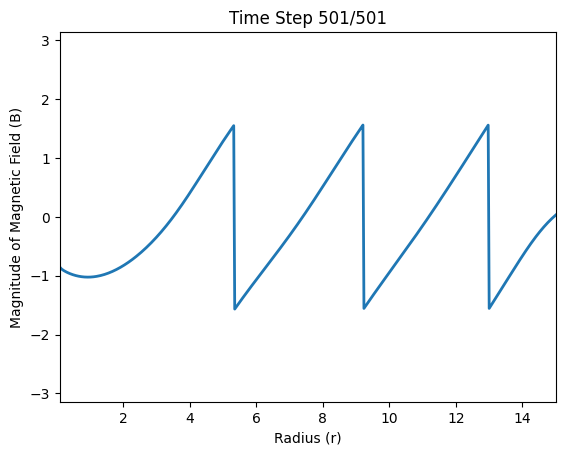

In [16]:

# Calculate pitch angle
pitch_angles = [np.arctan2(B_r, B_phi) for B_r, B_phi in zip(B_list, B_list_phi)]

fig, ax = plt.subplots()
ax.set_xlim(r_i, r_f)
ax.set_ylim(np.min(pitch_angles), np.max(pitch_angles))
ax.set_xlabel('Radius (r)')
ax.set_ylabel('Magnitude of Magnetic Field (B)')
ax.set_title('Evolution of Magnitude of Magnetic Field with Radius')
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = r
    # Ensure pitch angle is within the range -pi/2 < p <= pi/2
    y = np.where(pitch_angles[i] > np.pi / 2, pitch_angles[i] - np.pi, pitch_angles[i])
    y = np.where(y <= -np.pi / 2, y + np.pi, y)
    line.set_data(x, y)
    ax.set_title(f'Time Step {i+1}/{len(B_list_mag)}')
    return line,

ani = animation.FuncAnimation(fig, animate, frames=len(B_list_mag), init_func=init, blit=True)
ani.save('pitch1.gif', writer='ffmpeg', fps=30)

plt.show()


Now we will plot a $\log B $ vs time plot. For an exponential decay model, the slope of that plot will give the decay constant. Then we will find the global decay constant too, and plot it in a decay constant vs radius plot.

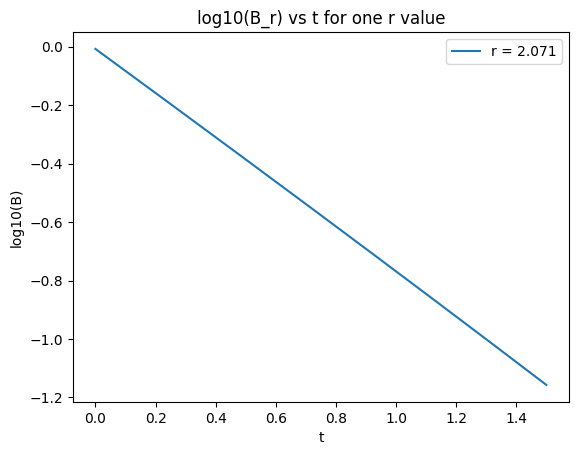

Slope: -0.765565955119098


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming B_list_t and r are defined
B_list_t = np.transpose(B_list)
t_list = np.linspace(0, T, len(B_list_t))

index = int(200 / 3)

plt.plot(t_list, np.log10(B_list_t[index][1:]), label=f'r = {r[index]:.3f}')
plt.xlabel('t')
plt.ylabel('log10(B)')
plt.legend()
plt.title('log10(B_r) vs t for one r value')
plt.show()

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(t_list, np.log10(B_list_t[index][1:]))
print("Slope:", slope)


/tmp/ipykernel_184405/1090882834.py:13: RuntimeWarning: invalid value encountered in log10
  slope, intercept, r_value, p_value, std_err = linregress(t_list, np.log10(B_list_t[index][1:]))


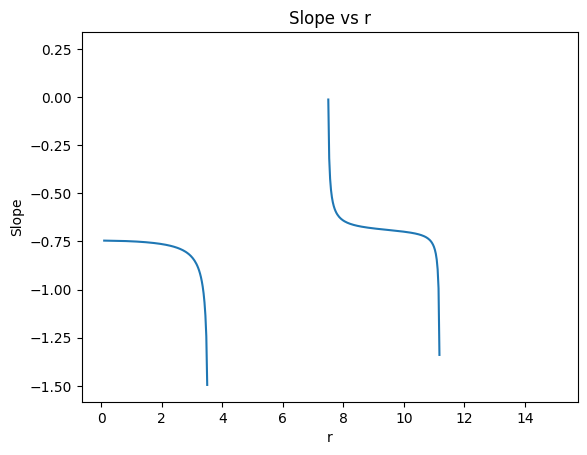

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming B_list_t and r are defined
B_list_t = np.transpose(B_list)
t_list = np.linspace(0, T, len(B_list_t))

slopes = []

for index in range(len(r)):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(t_list, np.log10(B_list_t[index][1:]))
    
    slopes.append(slope)

# Plot r vs slope
plt.plot(r, slopes)
plt.xlabel('r')
plt.ylabel('Slope')
plt.title('Slope vs r')
plt.show()


Global Decay Constant: -1.60322138005002
Point where slope becomes 0 (r): 2.5186372745490986


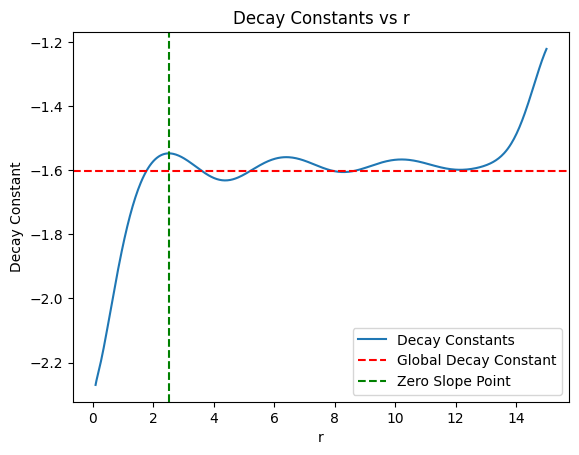

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming B_list_mag, T, and r are defined
B_list_mag = np.transpose(B_list_mag)
t_list = np.linspace(0, T, len(B_list_mag))

# Function to calculate slope for each value of r
def calculate_slope(B_list_mag, t_list):
    slopes = []
    for index in range(len(r)):
        # Fit a linear polynomial (line) to the log-transformed data
        coefficients = np.polyfit(t_list, np.log(B_list_mag[index][1:]), 1)
        # Extract slope
        slope = coefficients[0]
        slopes.append(slope)
    return slopes

slopes = calculate_slope(B_list_mag, t_list)

# Calculate global decay constant (average of all individual decay constants)
global_decay_constant = np.mean(slopes)

print("Global Decay Constant:", global_decay_constant)

# Plot individual decay constants against r
plt.plot(r, slopes, label='Decay Constants')
# Plot global decay constant as a horizontal line
plt.axhline(y=global_decay_constant, color='r', linestyle='--', label='Global Decay Constant')
plt.xlabel('r')
plt.ylabel('Decay Constant')
plt.title('Decay Constants vs r')
plt.legend()
dr = r[1] - r[0]
derivative = np.gradient(slopes, dr)

# Find the index where the derivative becomes 0
zero_slope_index = np.argwhere(np.diff(np.sign(derivative)) != 0).reshape(-1)[0]
zero_slope_r = r[zero_slope_index]

print("Point where slope becomes 0 (r):", zero_slope_r)

plt.axvline(x=zero_slope_r, color='g', linestyle='--', label='Zero Slope Point')
plt.legend()

plt.show()
